In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import plot_importance
from sklearn.inspection import permutation_importance

In [2]:
df = pd.read_csv("gapminder-scaled.csv")

X = df.drop(columns=['country', 'lex','cm'])
y = df['lex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

R² Score: 0.7935319442844433
RMSE: 0.08705003209569794


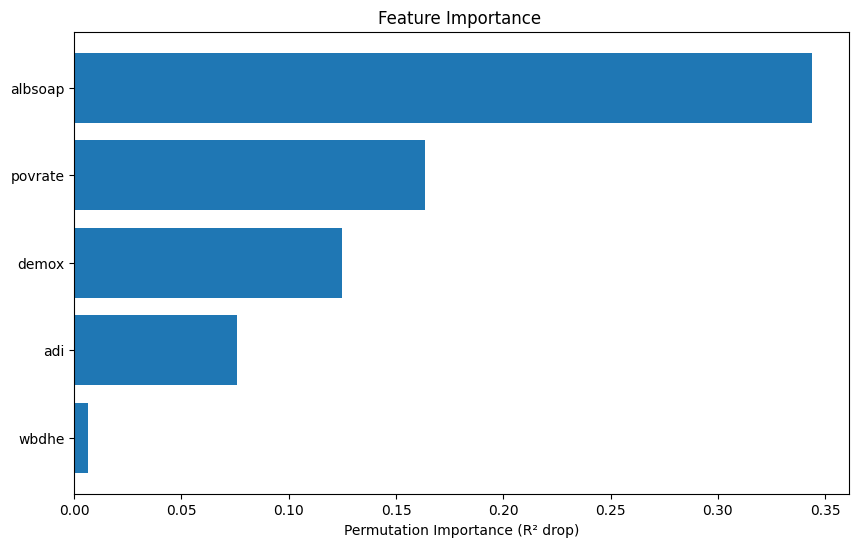

In [29]:
model = MLPRegressor(
    hidden_layer_sizes=(512,256,128,64),  
    activation='relu',
    solver='adam',
    alpha=0.00001,             
    learning_rate='adaptive',
    learning_rate_init=0.00001,
    max_iter=10000,
    n_iter_no_change=300,
)
X_train_temp = X_train.drop(columns=['munemployment', 'funemployment','whpw', 'isr10','vac', 'arppc', 'pop', 'popdens', 'iu', 'c02','albwsoap', 'gdp'])
X_test_temp = X_test.drop(columns=['munemployment', 'funemployment','whpw', 'isr10','vac', 'arppc', 'pop', 'popdens', 'iu', 'c02','albwsoap', 'gdp'])
model.fit(X_train_temp, y_train)

y_pred = model.predict(X_test_temp)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
result = permutation_importance(model, X_test_temp, y_test, n_repeats=10, scoring='r2')
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_test_temp.columns[sorted_idx])
plt.xlabel("Permutation Importance (R² drop)")
plt.title("Feature Importance ")
plt.show()

R² Score: 0.8517790049423022
RMSE: 0.0737560013818758


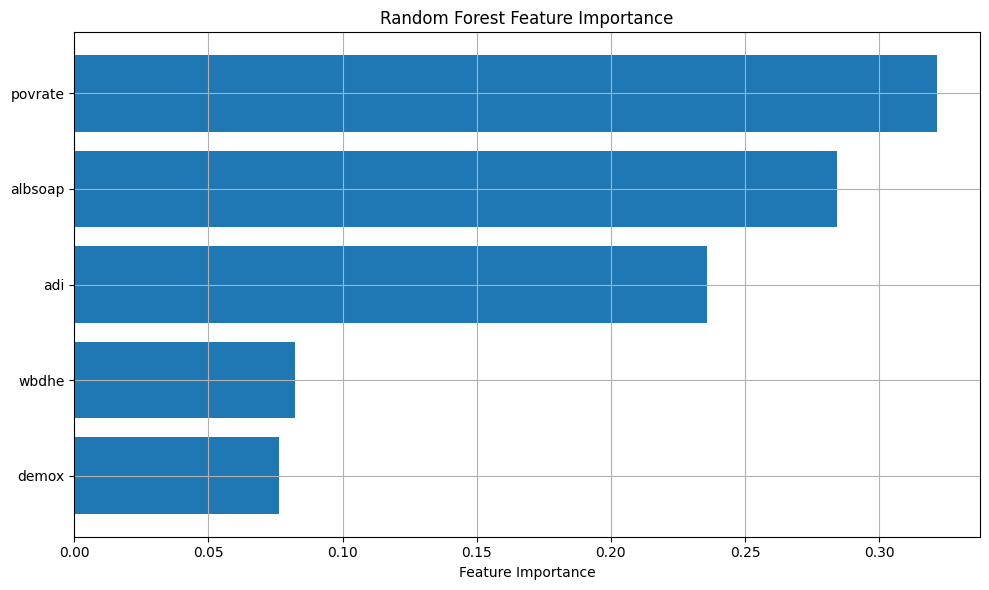

In [26]:
model = RandomForestRegressor(max_features='sqrt')
X_train_temp = X_train.drop(columns=['munemployment', 'funemployment','whpw', 'isr10','vac', 'arppc', 'pop', 'popdens', 'iu', 'c02','albwsoap', 'gdp'])
X_test_temp = X_test.drop(columns=['munemployment', 'funemployment','whpw', 'isr10','vac', 'arppc', 'pop', 'popdens', 'iu', 'c02','albwsoap', 'gdp'])
model.fit(X_train_temp, y_train)
y_pred = model.predict(X_test_temp)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


importances = model.feature_importances_
features = X_train_temp.columns


importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)



plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
parameters = {'criterion': ('friedman_mse', 'poisson','squared_error'), 'max_features': ('sqrt', 'log2', 1)}
rfr = RandomForestRegressor()
clf = GridSearchCV(estimator=rfr, 
                   param_grid=parameters,
                   scoring = 'r2',
                   verbose = 3, 
                   return_train_score=True
                   
                   )
clf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END criterion=friedman_mse, max_features=sqrt;, score=(train=0.991, test=0.930) total time=   0.4s
[CV 2/5] END criterion=friedman_mse, max_features=sqrt;, score=(train=0.991, test=0.946) total time=   0.4s
[CV 3/5] END criterion=friedman_mse, max_features=sqrt;, score=(train=0.992, test=0.933) total time=   0.4s
[CV 4/5] END criterion=friedman_mse, max_features=sqrt;, score=(train=0.991, test=0.943) total time=   0.4s
[CV 5/5] END criterion=friedman_mse, max_features=sqrt;, score=(train=0.991, test=0.935) total time=   0.4s
[CV 1/5] END criterion=friedman_mse, max_features=log2;, score=(train=0.991, test=0.933) total time=   0.4s
[CV 2/5] END criterion=friedman_mse, max_features=log2;, score=(train=0.991, test=0.944) total time=   0.4s
[CV 3/5] END criterion=friedman_mse, max_features=log2;, score=(train=0.992, test=0.934) total time=   0.4s
[CV 4/5] END criterion=friedman_mse, max_features=log2;, score=(train=0.991,

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ('friedman_mse', 'poisson',
                                       'squared_error'),
                         'max_features': ('sqrt', 'log2', 1)},
             return_train_score=True, scoring='r2', verbose=3)

In [20]:
model = XGBRegressor(
    n_estimators=400,
    max_depth=3,
    learning_rate=0.02,
    subsample=0.8,
)
X_train_temp = X_train.drop(columns=['munemployment', 'funemployment','whpw', 'isr10','vac', 'arppc', 'pop', 'popdens', 'iu', 'c02','albwsoap', 'gdp'])
X_test_temp = X_test.drop(columns=['munemployment', 'funemployment','whpw', 'isr10','vac', 'arppc', 'pop', 'popdens', 'iu', 'c02','albwsoap', 'gdp'])
model.fit(X_train_temp, y_train)
y_pred = model.predict(X_test_temp)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

xgb.plot_importance(model)
plt.title("XGBoost Feature Importance")
plt.show()

R² Score: 0.8522554149660495
RMSE: 0.07363737318439813


In [11]:
parameters = {'n_estimators': [50, 100, 200, 400],'max_depth': [3, 5, 7, 9], 'learning_rate': [0.01, 0.1, 0.2, 0.02, 0.005],'subsample': [0.8, 1.0]}
xgb = XGBRegressor()
clf = GridSearchCV(estimator=xgb, 
                   param_grid=parameters,
                   scoring = 'r2',
                   verbose = 3, 
                   return_train_score=True
                   
                   )
clf.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=(train=0.529, test=0.509) total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=(train=0.526, test=0.535) total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=(train=0.530, test=0.508) total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=(train=0.530, test=0.523) total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=(train=0.531, test=0.515) total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0;, score=(train=0.528, test=0.509) total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0;, score=(train=0.527, test=0.535) total time=   0.0s
[CV 3/5] END learning_rate=

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    lear...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.02, 0.005],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 200, 400],
                         'subsample': [0.8, 1.0]},
             return_train_score=True, scoring='r2', verbose=3)

In [23]:
model = KNeighborsRegressor(
    n_neighbors=12,      
    weights='distance', 
    algorithm='ball_tree'    
)
X_train_temp = X_train.drop(columns=['munemployment', 'funemployment','whpw', 'isr10','vac', 'arppc', 'pop', 'popdens', 'iu', 'c02','albwsoap', 'gdp'])
X_test_temp = X_test.drop(columns=['munemployment', 'funemployment','whpw', 'isr10','vac', 'arppc', 'pop', 'popdens', 'iu', 'c02','albwsoap', 'gdp'])
model.fit(X_train_temp, y_train)
y_pred = model.predict(X_test_temp)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
result = permutation_importance(model, X_test_temp, y_test, n_repeats=10, scoring='r2')
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_test_temp.columns[sorted_idx])
plt.xlabel("Permutation Importance (R² drop)")
plt.title("Feature Importance ")
plt.show()

R² Score: 0.8195701480764307
RMSE: 0.08137606733978198


In [8]:
parameters = {'n_neighbors':range(3,13), 'weights':('uniform','distance'), 'algorithm':('ball_tree', 'kd_tree', 'brute')}
knn = KNeighborsRegressor()
clf = GridSearchCV(estimator=knn, 
                   param_grid=parameters,
                   scoring = 'r2',
                   verbose = 3, 
                   return_train_score=True
                   
                   )
clf.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END algorithm=ball_tree, n_neighbors=3, weights=uniform;, score=(train=0.945, test=0.879) total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=3, weights=uniform;, score=(train=0.947, test=0.884) total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=3, weights=uniform;, score=(train=0.947, test=0.885) total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=3, weights=uniform;, score=(train=0.945, test=0.876) total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=3, weights=uniform;, score=(train=0.946, test=0.877) total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.890) total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.891) total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.897) total time

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ('ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': range(3, 13),
                         'weights': ('uniform', 'distance')},
             return_train_score=True, scoring='r2', verbose=3)